In [20]:
import pandas as pd
import numpy as np
from IPython.display import display
import plotly.express as px

## Read parquet dataset

In [2]:
df = pd.read_parquet("data/household.parquet")
display(df)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


## Null values

In [42]:
# Get all the null values
print("Null values per column:")
null_values = df.isna().sum()
null_percent = null_values * 100 / len(df)
null_values_df = pd.DataFrame(
    {"null_values": null_values, "null_value_percent": null_percent}
)
display(null_values_df)

Null values per column:


,null_values,null_value_percent
Global_active_power,0,0.0
Global_reactive_power,0,0.0
Voltage,0,0.0
Global_intensity,0,0.0
Sub_metering_1,0,0.0
Sub_metering_2,0,0.0
Sub_metering_3,0,0.0


## Descriptive statistics

In [3]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,1.090280,1.052628,0.076,0.310,0.614000,1.528,11.122
Global_reactive_power,2075259.0,0.123649,0.112419,0.000,0.048,0.100000,0.194,1.390
Voltage,2075259.0,240.832785,3.237763,223.200,238.990,241.000000,242.870,254.150
Global_intensity,2075259.0,4.621481,4.424361,0.200,1.400,2.751585,6.400,48.400
Sub_metering_1,2075259.0,1.109485,6.115843,0.000,0.000,0.000000,0.000,88.000
Sub_metering_2,2075259.0,1.289229,5.786613,0.000,0.000,0.000000,1.000,80.000
Sub_metering_3,2075259.0,6.442386,8.415860,0.000,0.000,1.000000,17.000,31.000


## Correlations

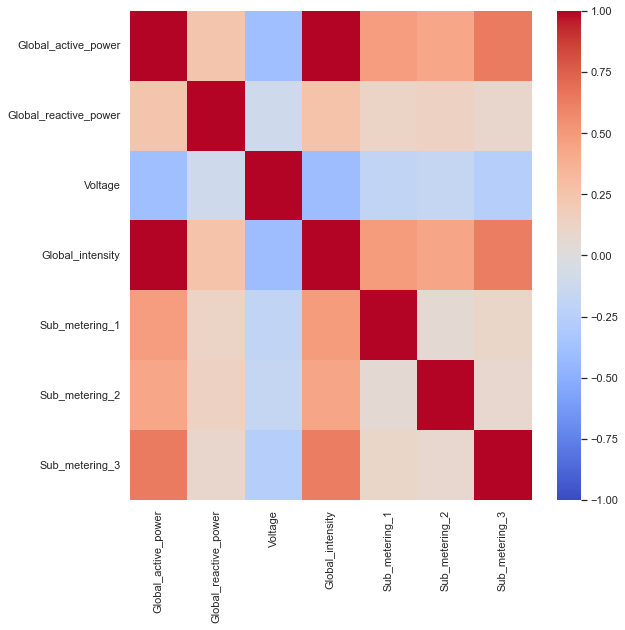

In [6]:
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

corr = df.corr()
plt.figure(figsize=(9, 9))
cmap = sns.diverging_palette(220, 0)
heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.show()

In [5]:
# Get correlations pairs
pairs = corr.abs().unstack()
pairs = pairs[pairs < 1]
pairs = pairs.sort_values(kind="quicksort", ascending=False)
print("Most correlated pairs:")
display(pairs.head(5))

Most correlated pairs:


Global_active_power  Global_intensity       0.998887
Global_intensity     Global_active_power    0.998887
Global_active_power  Sub_metering_3         0.639272
Sub_metering_3       Global_active_power    0.639272
                     Global_intensity       0.627264
dtype: float64

## Resample and plot on different scales
Exclude data before July 2007, as it looks relatively high with respect to the remaining data.

In [28]:
def run_sequence_plot(x, y, title, xtitle, ytitle):
    fig = px.line(x=x, y=y)
    fig.update_layout(title=title, width=800, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [54]:
var = "Global_active_power"

# Monthly
df_month = df.resample("M").quantile(0.995)
run_sequence_plot(
    df_month.index,
    df_month[var],
    title=f"Monthly 99.5% percentile {var}",
    xtitle="Time",
    ytitle=f"{var}",
)

# var2 = 'Global_reactive_power'
# run_sequence_plot(df_month.index, df_month[var2], title=f'Monthly {var2}', xtitle='Time', ytitle=f'{var2}')

In [50]:
# Weekly
df_week = df.resample("W").quantile(0.995)
run_sequence_plot(
    df_week.index, df_week[var], title=f"Weekly {var}", xtitle="Time", ytitle=f"{var}"
)

In [51]:
# Daily
df_daily = df.loc["2010"].resample("D").quantile(0.995)
run_sequence_plot(
    df_daily.index, df_daily[var], title=f"Daily {var}", xtitle="Time", ytitle=f"{var}"
)

## Investigate stationariety
The data is non-stationary: the mean value is not constant, there is a negative trend present, and seasonality is visible. It is not clear whether there is heteroskedasticity. The data seems to have autocorrelation as well.

### Statistics on different chunks of data

In [77]:
n_chunks = 20
chunks = np.array_split(df_week[var], indices_or_sections=n_chunks)

variances = []
means = []
for chunk in chunks:
    means.append(np.mean(chunk))
    variances.append(np.var(chunk))

chunks_df = pd.DataFrame({'mean': means, 'var': variances})
display(chunks_df)

,mean,var
0,6.172706,0.546804
1,5.628094,0.432486
2,5.053844,0.482404
3,5.449743,0.218018
4,5.945682,0.337436
5,5.449962,0.760346
6,5.513478,0.220045
7,4.981947,0.511416
8,4.727009,1.917070
9,5.567147,0.725575


### Histograms

<AxesSubplot:>

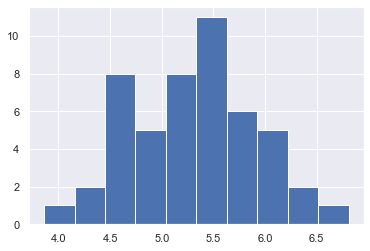

In [78]:
df_month[var].hist()

<AxesSubplot:>

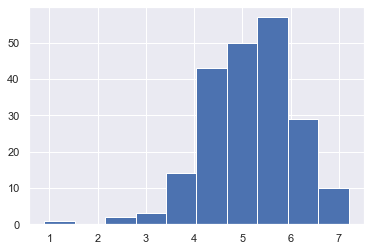

In [79]:
df_week[var].hist()

### Augmented Dickey-Fuller test

In [84]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df_month[var])
print(f"Test statistic: {adf:.3f}, pvalue: {pvalue:.3f}")
print(f"Critical values: {critical_values}")

Test statistic: -2.985, pvalue: 0.036
Critical values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}


In [82]:
adfuller?